## Perform Clustering(Hierarchical, Kmeans & DBSCAN) for the crime data and identify the number of clusters formed and draw inferences.

* Data Description:
* Murder -- Muder rates in different places of United States
*  Assualt- Assualt rate in different places of United States
* UrbanPop - urban population in different places of United States
* Rape - Rape rate in different places of United States


In [1]:
# importing libraries
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sn 

In [2]:
# reading csv 
crime_data= pd.read_csv("D:/DATA SCIENCE/ASSIGNMENT CSV/crime_data.csv")
crime_data.head(10)

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6
5,Colorado,7.9,204,78,38.7
6,Connecticut,3.3,110,77,11.1
7,Delaware,5.9,238,72,15.8
8,Florida,15.4,335,80,31.9
9,Georgia,17.4,211,60,25.8


In [24]:
crime_data=crime_data.rename(columns={'Unnamed:0':'State'})

In [4]:
crime_data.shape

(50, 5)

In [5]:
crime_data.describe()

,Murder,Assault,UrbanPop,Rape
count,50.00000,50.000000,50.000000,50.000000
mean,7.78800,170.760000,65.540000,21.232000
std,4.35551,83.337661,14.474763,9.366385
min,0.80000,45.000000,32.000000,7.300000
25%,4.07500,109.000000,54.500000,15.075000
50%,7.25000,159.000000,66.000000,20.100000
75%,11.25000,249.000000,77.750000,26.175000
max,17.40000,337.000000,91.000000,46.000000


In [6]:
crime_data.isna().sum()

Unnamed: 0    0
Murder        0
Assault       0
UrbanPop      0
Rape          0
dtype: int64

In [7]:
# Normalization function
def norm_func(i):
    x=(i-i.min())/(i.max()-i.min())
    return(x)

In [8]:
# Normalizing data frame ( considering numerical  part data)
df_norm=norm_func(crime_data.iloc[:,1:])

In [9]:
df_norm

,Murder,Assault,UrbanPop,Rape
0,0.746988,0.654110,0.440678,0.359173
1,0.554217,0.746575,0.271186,0.961240
2,0.439759,0.852740,0.813559,0.612403
3,0.481928,0.496575,0.305085,0.315245
4,0.493976,0.791096,1.000000,0.860465
5,0.427711,0.544521,0.779661,0.811370
6,0.150602,0.222603,0.762712,0.098191
7,0.307229,0.660959,0.677966,0.219638
8,0.879518,0.993151,0.813559,0.635659
9,1.000000,0.568493,0.474576,0.478036


Text(0, 0.5, 'Distance')

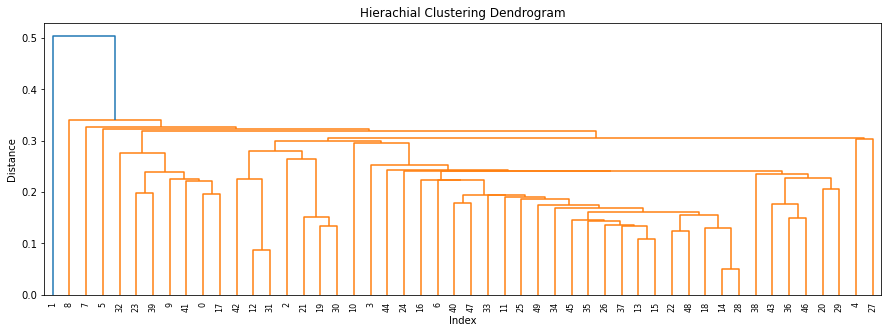

In [11]:
# creating dendrogram using  single linkage
plt.figure(figsize=(15, 5))
dendorogram=sch.dendrogram(sch.linkage(df_norm, method='single'))
plt.title("Hierachial Clustering Dendrogram")
plt.xlabel('Index')
plt.ylabel('Distance')


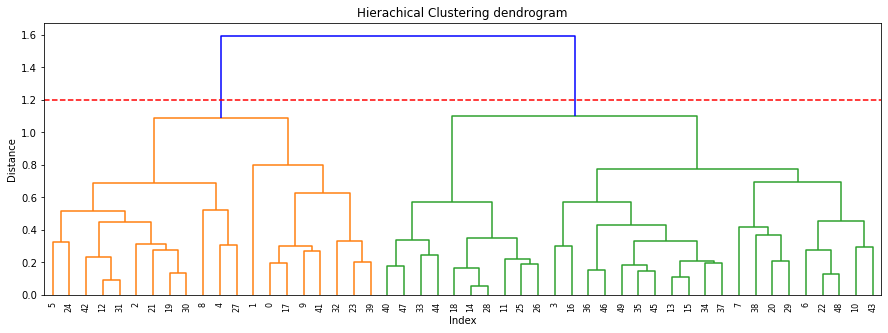

In [12]:
# creating dendrogram using complete linkage method
plt.figure(figsize=(15, 5))
dendrogram=sch.dendrogram(sch.linkage(df_norm,method='complete'), above_threshold_color='blue')
plt.title('Hierachical Clustering dendrogram')
plt.xlabel('Index')
plt.ylabel('Distance')
plt.axhline(y=1.2, color='r',linestyle='--')

## The vertical line with maximum distance is the blue line and hence we can decide a threshold of 1.2 and cut the dendrogram.

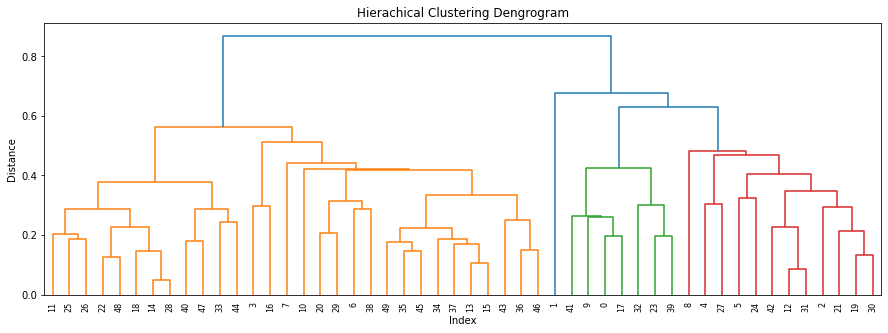

In [14]:
# creating a dendrogram usong average method
plt.figure(figsize=(15, 5))
dendrogram=sch.dendrogram(sch.linkage(df_norm, method='average'))
plt.title('Hierachical Clustering Dengrogram')
plt.xlabel('Index')
plt.ylabel('Distance')
plt.axhline(y=1.2, color='r', linestyle='--')

In [15]:
# creatng clusters
hc= AgglomerativeClustering(n_clusters=4, affinity='euclidean' , linkage='complete') # we are using complete linkage here

In [17]:
# save clusters for chart
y_hc=hc.fit_predict(df_norm)
clusters=pd.DataFrame(y_hc,columns=['clusters'])

In [20]:
cluster_lables=pd.Series(hc.labels_)

In [21]:
hc.labels_

array([0, 0, 3, 1, 3, 3, 1, 1, 3, 0, 1, 2, 3, 1, 2, 1, 1, 0, 2, 3, 1, 3,
       1, 0, 3, 2, 2, 3, 2, 1, 3, 3, 0, 2, 1, 1, 1, 1, 1, 0, 2, 0, 3, 1,
       2, 1, 1, 2, 1, 1], dtype=int64)

In [22]:
crime_data['h_clusterid']= hc.labels_

In [26]:
crime_data=crime_data.rename(columns={'Unnamed: 0':'state'})

In [27]:
crime_data.head(10)

,state,Murder,Assault,UrbanPop,Rape,h_clusterid
0,Alabama,13.2,236,58,21.2,0
1,Alaska,10.0,263,48,44.5,0
2,Arizona,8.1,294,80,31.0,3
3,Arkansas,8.8,190,50,19.5,1
4,California,9.0,276,91,40.6,3
5,Colorado,7.9,204,78,38.7,3
6,Connecticut,3.3,110,77,11.1,1
7,Delaware,5.9,238,72,15.8,1
8,Florida,15.4,335,80,31.9,3
9,Georgia,17.4,211,60,25.8,0


In [28]:
crime_data.h_clusterid.value_counts()

1    20
3    12
2    10
0     8
Name: h_clusterid, dtype: int64

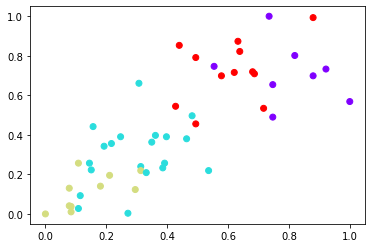

In [30]:
plt.scatter(x=df_norm['Murder'], y=df_norm['Assault'], c=cluster_lables, cmap='rainbow')

## We can see the data points in the form of four clusters in the above scatter plot
​

 ## Kmeans clustering

In [31]:
from sklearn.cluster import KMeans

In [33]:
# reading csv 
crime_data_k=pd.read_csv("D:/DATA SCIENCE/ASSIGNMENT CSV/crime_data.csv")

In [34]:
crime_data_k=crime_data_k.rename(columns={'Unnamed: 0':'satate'})

In [35]:
# Normalization function
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
scaled_crime_df=scaler.fit_transform(crime_data_k.iloc[:,1:])

## Finding optimum number of clusters using within-cluster sum-of-squares criterion or elbow method

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


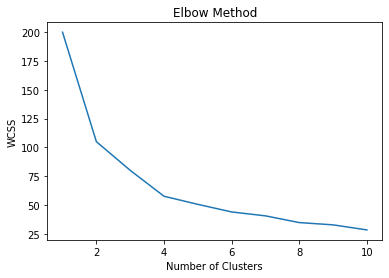

In [38]:
wcss=[]
for i in range (1, 11):
    kmeans= KMeans(n_clusters=i, random_state=0)
    kmeans.fit(scaled_crime_df)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [39]:
#Build Cluster algorithm
from sklearn.cluster import KMeans
clusters_new = KMeans(4, random_state=42)
clusters_new.fit(scaled_crime_df)

KMeans(n_clusters=4, random_state=42)

In [40]:
clusters_new.labels_

array([1, 2, 2, 1, 2, 2, 0, 0, 2, 1, 0, 3, 2, 0, 3, 0, 3, 1, 3, 2, 0, 2,
       3, 1, 2, 3, 3, 2, 3, 0, 2, 2, 1, 3, 0, 0, 0, 0, 0, 1, 3, 1, 2, 0,
       3, 0, 0, 3, 3, 0])

In [42]:
# assign cluster to the data set
crime_data_k['clusterid_new']=clusters_new.labels_

In [44]:
# these are standardized value
clusters_new.cluster_centers_

array([[-0.49440658, -0.3864845 ,  0.58167593, -0.26431024],
       [ 1.42622412,  0.88321132, -0.82279055,  0.01946669],
       [ 0.70212683,  1.04999438,  0.72997363,  1.28990383],
       [-0.97130281, -1.11783581, -0.93954982, -0.97657842]])

In [45]:
crime_data_k.groupby('clusterid_new').agg(['mean']).reset_index()

,clusterid_new,Murder,Assault,UrbanPop,Rape
,,mean,mean,mean,mean
0,0,5.656250,138.875000,73.875000,18.781250
1,1,13.937500,243.625000,53.750000,21.412500
2,2,10.815385,257.384615,76.000000,33.192308
3,3,3.600000,78.538462,52.076923,12.176923


In [47]:
crime_data_k.head(10)

,satate,Murder,Assault,UrbanPop,Rape,clusterid_new
0,Alabama,13.2,236,58,21.2,1
1,Alaska,10.0,263,48,44.5,2
2,Arizona,8.1,294,80,31.0,2
3,Arkansas,8.8,190,50,19.5,1
4,California,9.0,276,91,40.6,2
5,Colorado,7.9,204,78,38.7,2
6,Connecticut,3.3,110,77,11.1,0
7,Delaware,5.9,238,72,15.8,0
8,Florida,15.4,335,80,31.9,2
9,Georgia,17.4,211,60,25.8,1


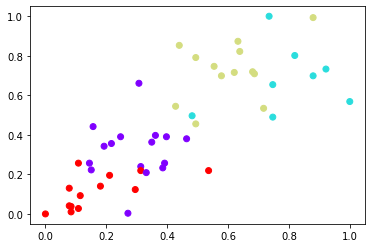

In [48]:
plt.scatter(x=df_norm['Murder'], y=df_norm['Assault'],c=clusters_new.labels_, cmap='rainbow')

## We can see the data points in the form of four clusters in the above scatter plot
​

## DB SCAN

In [49]:
from sklearn.cluster import DBSCAN

In [50]:
# reading csv 
crime_data_db=pd.read_csv("D:/DATA SCIENCE/ASSIGNMENT CSV/crime_data.csv")

In [51]:
crime_data_db=crime_data_db.rename(columns={'Unnamed: 0':'state'})

In [52]:
# Normalization function 
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x= scaler.fit_transform(crime_data_db.iloc[:,1:])

In [54]:
dbscan= DBSCAN(eps=1.05, min_samples=4)
dbscan.fit(x)

DBSCAN(eps=1.05, min_samples=4)

In [56]:
dbscan.labels_

array([ 0, -1,  2,  1, -1, -1,  1, -1, -1, -1, -1,  1, -1,  1,  1,  1,  1,
        0,  1,  2,  1,  2,  1, -1,  1,  1,  1, -1,  1,  1,  2, -1, -1,  1,
        1,  1,  1,  1,  1,  0,  1,  0, -1,  1,  1,  1,  1,  1,  1,  1],
      dtype=int64)

In [58]:
db_cluster=pd.DataFrame(dbscan.labels_, columns=['cluster'])

In [60]:
db_cluster.head(5)

,cluster
0,0
1,-1
2,2
3,1
4,-1


In [61]:
pd.concat([crime_data_db,db_cluster],axis=1)

,state,Murder,Assault,UrbanPop,Rape,cluster
0,Alabama,13.2,236,58,21.2,0
1,Alaska,10.0,263,48,44.5,-1
2,Arizona,8.1,294,80,31.0,2
3,Arkansas,8.8,190,50,19.5,1
4,California,9.0,276,91,40.6,-1
5,Colorado,7.9,204,78,38.7,-1
6,Connecticut,3.3,110,77,11.1,1
7,Delaware,5.9,238,72,15.8,-1
8,Florida,15.4,335,80,31.9,-1
9,Georgia,17.4,211,60,25.8,-1


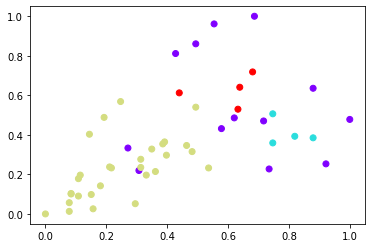

In [62]:
plt.scatter(x=df_norm['Murder'], y=df_norm['Rape'],c=dbscan.labels_, cmap='rainbow')

## We can see the data points in the form of Two clusters in the above scatter plot